In [34]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt


In [35]:
h1b_df = pd.read_csv("h1b_kaggle.csv")


In [124]:
#h1b_df_data[h1b_df_data.EMPLOYER_NAME.str.contains("DATAXU")]

In [6]:
grouped_employer = h1b_df.groupby('EMPLOYER_NAME')
grouped_employer_wage = grouped_employer['PREVAILING_WAGE'].agg('count')
#grouped_employer_wage.sort_values(ascending=False)

In [37]:
## CASE_STATUS : certified, denied, withdrawn
#grouped_case = h1b_df.groupby(['EMPLOYER_NAME','CASE_STATUS'])['PREVAILING_WAGE'].agg('count')
#grouped_case_infy = grouped_case[['INFOSYS LIMITED']]
#grouped_case_infy.head()


In [36]:
#h1b_df_new = h1b_df.dropna()
#h1b_sandisk = h1b_df_new[h1b_df_new['EMPLOYER_NAME'].str.contains('SANDISK')]
#h1b_sandisk_design = h1b_sandisk[h1b_sandisk['JOB_TITLE'].str.contains('DESIGN ENGINEER II')]
#h1b_sandisk_design.groupby('YEAR')['PREVAILING_WAGE'].agg(['count','min','max','mean'])

In [8]:
h1b_df_new = h1b_df.dropna(subset=['CASE_STATUS','EMPLOYER_NAME','PREVAILING_WAGE','SOC_NAME','JOB_TITLE','YEAR'])
h1b_df_new.replace(to_replace='COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION',value='COGNIZANT TECHNOLOGY',inplace=True)
h1b_clean = h1b_df_new[h1b_df_new['PREVAILING_WAGE']<2000000]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
soft_jobs = h1b_clean[h1b_clean['JOB_TITLE'].str.contains('SOFTWARE ENGINEER')]
hard_jobs = h1b_clean[h1b_clean['JOB_TITLE'].str.contains('HARDWARE ENGINEER')]
data_jobs = h1b_clean[(h1b_clean['JOB_TITLE'].str.contains('DATA ENGINEER'))|(h1b_clean['JOB_TITLE'].str.contains('DATA SCIENTIST'))]
ba_jobs = h1b_clean[h1b_clean['JOB_TITLE'].str.contains('BUSINESS ANALYST')]

In [10]:
data_job_growth = data_jobs.groupby('YEAR')['CASE_STATUS'].agg('count')
data_job_growth = data_job_growth/data_job_growth[2011]
soft_job_growth = soft_jobs.groupby('YEAR')['CASE_STATUS'].agg('count')
soft_job_growth = soft_job_growth/soft_job_growth[2011]


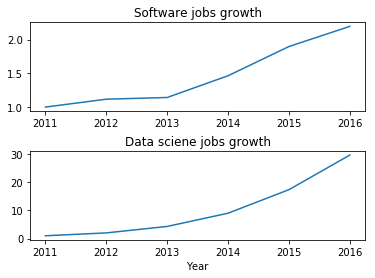

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(soft_job_growth.index,soft_job_growth)
ax2.plot(data_job_growth.index,data_job_growth)
plt.xlabel('Year')
ax1.set_title('Software jobs growth')
ax2.set_title('Data sciene jobs growth')
plt.subplots_adjust(hspace=0.45)


In [33]:
h1b_df_filecount = h1b_df_new.groupby('EMPLOYER_NAME')['CASE_STATUS'].agg('count')
top_filers = h1b_df_filecount.sort_values(ascending=False)[:15]
#h1b_clean.shape
top_filers['INFOSYS LIMITED']

130592

Text(0,0.5,'')

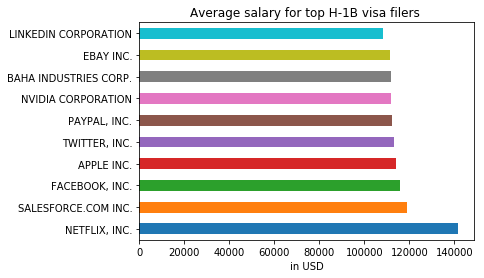

In [13]:
## Salary study
big_employer_list = [x for x in h1b_df_filecount.index if h1b_df_filecount[x]>500]
df_big_employer = h1b_clean[h1b_clean['EMPLOYER_NAME'].isin(big_employer_list)]
salaries = df_big_employer.groupby('EMPLOYER_NAME')['PREVAILING_WAGE'].agg('mean').sort_values(ascending=False)[:10]
salaries.plot.barh()
plt.title('Average salary for top H-1B visa filers ')
plt.xlabel('in USD')
plt.ylabel('')


Text(0,0.5,'')

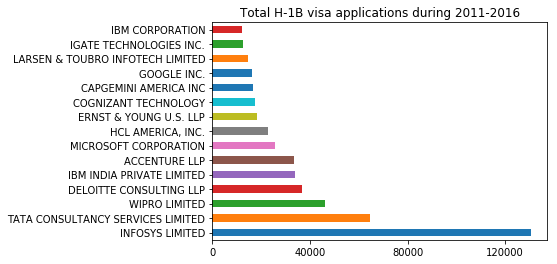

In [29]:
top_filers.plot.barh()
plt.title('Total H-1B visa applications during 2011-2016')
plt.xticks([0,40000,80000,120000])
plt.ylabel('')

Text(0,0.5,'')

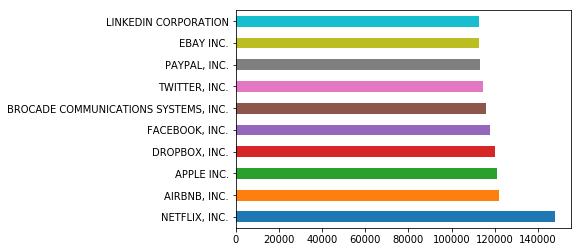

In [21]:
## Software job profile study
soft_jobs_employer_count = soft_jobs.groupby('EMPLOYER_NAME')['CASE_STATUS'].agg('count')
soft_jobs_big_employer = [x for x in soft_jobs_employer_count.index if soft_jobs_employer_count[x]>200] 
df_soft_jobs_big_employer = soft_jobs[soft_jobs['EMPLOYER_NAME'].isin(soft_jobs_big_employer)]
soft_salaries = df_soft_jobs_big_employer.groupby('EMPLOYER_NAME')['PREVAILING_WAGE'].agg('mean').sort_values(ascending=False)[:10]
soft_salaries.plot.barh()
plt.ylabel('')

Text(0,0.5,'')

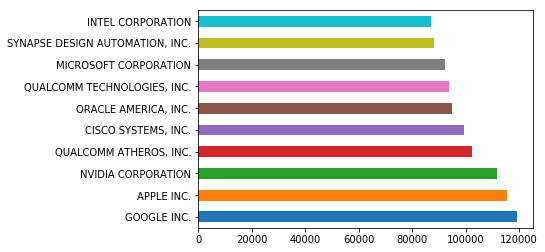

In [22]:
## Hardware job profile study
hard_jobs_employer_count = hard_jobs.groupby('EMPLOYER_NAME')['CASE_STATUS'].agg('count')
hard_jobs_big_employer = [x for x in hard_jobs_employer_count.index if hard_jobs_employer_count[x]>50] 
df_hard_jobs_big_employer = hard_jobs[hard_jobs['EMPLOYER_NAME'].isin(hard_jobs_big_employer)]
hard_salaries = df_hard_jobs_big_employer.groupby('EMPLOYER_NAME')['PREVAILING_WAGE'].agg('mean').sort_values(ascending=False)[:10]
hard_salaries.plot.barh()
plt.ylabel('')

Text(0,0.5,'')

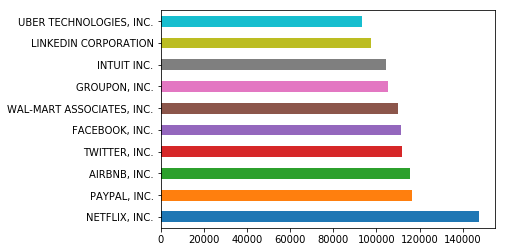

In [28]:
## Data Scientist job profile study
data_jobs_employer_count = data_jobs.groupby('EMPLOYER_NAME')['CASE_STATUS'].agg('count')
data_jobs_big_employer = [x for x in data_jobs_employer_count.index if data_jobs_employer_count[x]>25] 
df_data_jobs_big_employer = data_jobs[data_jobs['EMPLOYER_NAME'].isin(data_jobs_big_employer)]
data_salaries = df_data_jobs_big_employer.groupby('EMPLOYER_NAME')['PREVAILING_WAGE'].agg('mean').sort_values(ascending=False)[:10]
data_salaries.plot.barh()
plt.ylabel('')